# 1. Importando e instalando dependências

In [1]:
!pip install tensorflow==2.12.0 opencv-python mediapipe scikit-learn matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [6]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [8]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [10]:
def draw_landmarks(image, results):
    #mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    #mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [12]:
def draw_styled_landmarks(image, results):
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [14]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

C:\Users\Flavia Almeida\AppData\Roaming\Python\Python311\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [16]:
results

mediapipe.python.solution_base.SolutionOutputs

In [18]:
draw_landmarks(frame, results)

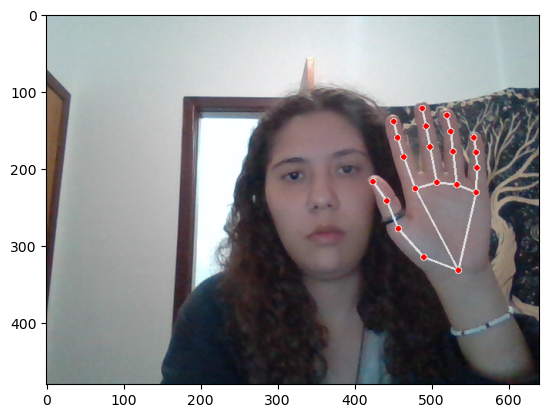

In [20]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [23]:
len(results.pose_landmarks.landmark)

33

In [25]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [27]:
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [29]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
face

array([ 0.56599182,  0.57328546, -0.03221011, ...,  0.63450658,
        0.41271815,  0.01709738])

In [31]:
def extract_keypoints(results):
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    #return np.concatenate([pose, face, lh, rh])
    return np.concatenate([lh, rh])

In [33]:
result_test = extract_keypoints(results)

In [35]:
np.save('0', result_test)

In [37]:
np.load('0.npy')

array([ 8.36523116e-01,  6.92521155e-01,  2.79205068e-07,  7.65672088e-01,
        6.57100201e-01, -1.82676520e-02,  7.14638531e-01,  5.80154240e-01,
       -2.20002066e-02,  6.91785038e-01,  5.05904078e-01, -2.49206815e-02,
        6.64054215e-01,  4.53660041e-01, -2.70572584e-02,  7.49443412e-01,
        4.70895737e-01,  8.72473873e-04,  7.25961983e-01,  3.85566860e-01,
       -1.08866217e-02,  7.13979363e-01,  3.35243285e-01, -2.31491905e-02,
        7.05054522e-01,  2.90950119e-01, -3.28698568e-02,  7.92438745e-01,
        4.55052882e-01, -2.56832829e-03,  7.79616058e-01,  3.60179663e-01,
       -9.96575877e-03,  7.71425009e-01,  3.02741289e-01, -2.12229379e-02,
        7.64011264e-01,  2.55685717e-01, -3.05254888e-02,  8.32863331e-01,
        4.60619241e-01, -1.03552314e-02,  8.25951636e-01,  3.71837139e-01,
       -2.13677660e-02,  8.20681810e-01,  3.18626732e-01, -3.06414478e-02,
        8.13709497e-01,  2.73156375e-01, -3.80844027e-02,  8.72755647e-01,
        4.81498420e-01, -

# 4. Setup Folders for Collection

In [358]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'J', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [360]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [356]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'Comece', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Coletando frames para {} Video N° {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Coletando frames para {} Video N° {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [275]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [363]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [365]:
label_map = {label:num for num, label in enumerate(actions)}

In [367]:
label_map

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'J': 10,
 'H': 8,
 'I': 9,
 'K': 11,
 'L': 12,
 'M': 13,
 'N': 14,
 'O': 15}

In [369]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [371]:
np.array(sequences).shape

(480, 30, 126)

In [373]:
np.array(labels).shape

(480,)

In [375]:
X = np.array(sequences)

In [377]:
X.shape

(480, 30, 126)

In [379]:
y = to_categorical(labels).astype(int)

In [381]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [383]:
y_test.shape

(24, 16)

# 7. Build and Train LSTM Neural Network

In [386]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard

In [388]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [390]:
model = Sequential()

# Primeira camada LSTM com Dropout e Batch Normalization
model.add(LSTM(64, return_sequences=True, activation='tanh', input_shape=(30, 126)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

# Segunda camada LSTM com Dropout e Batch Normalization
model.add(LSTM(128, return_sequences=True, activation='tanh'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

# Terceira camada LSTM com Dropout e Batch Normalization
model.add(LSTM(64, return_sequences=False, activation='tanh'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

# Primeira camada densa
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

# Segunda camada densa
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

# Camada de saída
model.add(Dense(actions.shape[0], activation='softmax'))

In [392]:
res = [.7, 0.2, 0.1]

In [394]:
actions[np.argmax(res)]

'A'

In [396]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [398]:
model.fit(X_train, y_train, epochs=200, callbacks=[tb_callback])

Epoch 1/200
15/15 [==============================] - 7s 49ms/step - loss: 2.9299 - accuracy: 0.0702
Epoch 2/200
15/15 [==============================] - 1s 45ms/step - loss: 2.6646 - accuracy: 0.1184
Epoch 3/200
15/15 [==============================] - 1s 44ms/step - loss: 2.5311 - accuracy: 0.1776
Epoch 4/200
15/15 [==============================] - 1s 46ms/step - loss: 2.4016 - accuracy: 0.2259
Epoch 5/200
15/15 [==============================] - 1s 45ms/step - loss: 2.2673 - accuracy: 0.2303
Epoch 6/200
15/15 [==============================] - 1s 44ms/step - loss: 2.1258 - accuracy: 0.2982
Epoch 7/200
15/15 [==============================] - 1s 45ms/step - loss: 2.0304 - accuracy: 0.3246
Epoch 8/200
15/15 [==============================] - 1s 45ms/step - loss: 1.8015 - accuracy: 0.3553
Epoch 9/200
15/15 [==============================] - 1s 44ms/step - loss: 1.6893 - accuracy: 0.4342
Epoch 10/200
15/15 [==============================] - 1s 47ms/step - loss: 1.5586 - accuracy: 0.4715

In [400]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 30, 64)            48896     
                                                                 
 dropout_20 (Dropout)        (None, 30, 64)            0         
                                                                 
 batch_normalization_12 (Bat  (None, 30, 64)           256       
 chNormalization)                                                
                                                                 
 lstm_13 (LSTM)              (None, 30, 128)           98816     
                                                                 
 dropout_21 (Dropout)        (None, 30, 128)           0         
                                                                 
 batch_normalization_13 (Bat  (None, 30, 128)          512       
 chNormalization)                                     

# 8. Make Predictions

In [403]:
res = model.predict(X_test)

1/1 [==============================] - 1s 1s/step


In [405]:
res

array([[1.67436687e-09, 2.99721741e-08, 1.08630738e-04, 6.11133582e-05,
        1.63791697e-07, 2.99423308e-09, 1.50650862e-07, 1.10928031e-08,
        6.16921070e-10, 3.81386798e-07, 3.51063306e-07, 9.04152557e-07,
        7.32821209e-05, 8.82017321e-06, 1.86132070e-07, 9.99746025e-01],
       [1.07475081e-07, 7.02966885e-09, 1.41961038e-07, 9.99906898e-01,
        1.73790710e-07, 1.15897320e-10, 4.53163693e-07, 1.45167125e-11,
        5.95491883e-07, 5.12124287e-10, 3.80368377e-08, 1.87561654e-05,
        7.26713333e-05, 1.05694165e-09, 2.05078021e-11, 1.91040741e-07],
       [1.73588160e-05, 6.70325980e-02, 3.55238939e-04, 9.76810156e-07,
        3.31139803e-04, 9.32125151e-01, 2.03569272e-07, 3.96116429e-09,
        1.64308440e-05, 1.11338515e-04, 4.97367765e-08, 9.00851319e-06,
        1.68498285e-10, 1.71825818e-07, 2.90747039e-07, 3.96620123e-08],
       [1.02068915e-03, 2.14515112e-05, 1.06881064e-08, 3.15279380e-04,
        7.73941720e-05, 1.02058287e-07, 8.88881922e-01, 1.621

In [407]:
actions[np.argmax(res[4])]

'K'

In [409]:
actions[np.argmax(y_test[4])]

'K'

# 9. Save Weights

In [412]:
model.save('action.h5')

In [414]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [417]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [419]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 43ms/step


In [421]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [423]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[23,  0],
        [ 0,  1]],

       [[19,  0],
        [ 0,  5]],

       [[20,  0],
        [ 0,  4]],

       [[22,  0],
        [ 1,  1]],

       [[21,  0],
        [ 0,  3]],

       [[23,  0],
        [ 0,  1]],

       [[22,  0],
        [ 0,  2]],

       [[23,  0],
        [ 0,  1]],

       [[22,  1],
        [ 0,  1]],

       [[23,  0],
        [ 0,  1]],

       [[21,  0],
        [ 0,  3]]], dtype=int64)

In [425]:
accuracy_score(ytrue, yhat)

0.9583333333333334

# 11. Test in Real Time

In [428]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()        
    return output_frame

In [430]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

C:\Users\Flavia Almeida\AppData\Roaming\Python\Python311\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [131]:
sequence.reverse()

In [ ]:
len(sequence)

In [ ]:
sequence.append('def')

In [ ]:
sequence.reverse()

In [ ]:
sequence[-30:]

In [ ]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
res[np.argmax(res)] > threshold

In [ ]:
(num_sequences,30,1662)

In [ ]:
model.predict(np.expand_dims(X_test[0], axis=0))